In [1]:
!pip install opencv-python

     |████████████████████████████████| 46.4 MB 22.1 MB/s eta 0:00:01


In [17]:
import cv2
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from IPython import display

In [7]:
def load_images(folder):
    dir_list = []
    for filename in os.listdir(folder):
        dir_list.append(filename)
    return dir_list

In [8]:
full_data=load_images("/Users/ira/Documents/GitHub/ML-Project/Full Data")

In [9]:
# Initialize the variables
image_width = 128
image_length = 128
total_pixels = image_width*image_length
total_images = 1280

Normalized Vectors: [[ 22.57890625  12.57890625 -57.42109375 ... 124.57890625 144.57890625
  -79.42109375]
 [-21.87890625  13.12109375 -60.87890625 ... 128.12109375 145.12109375
  -78.87890625]
 [ 24.7125      13.7125     -70.2875     ... 130.7125     145.7125
  -79.2875    ]
 ...
 [-73.80703125 -54.80703125  -4.80703125 ...  33.19296875  33.19296875
  -73.80703125]
 [-80.49921875 -42.49921875 -15.49921875 ...  19.50078125  39.50078125
  -74.49921875]
 [-85.9546875  -32.9546875  -64.9546875  ...   8.0453125   44.0453125
  -73.9546875 ]]


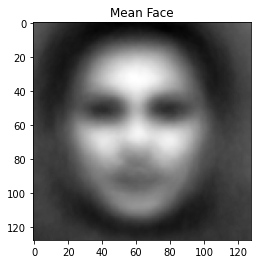

In [10]:
#STEP1: Convert the face images to face vectors
face_vector = []
for j in full_data:
    face_image = cv2.cvtColor(cv2.imread("/Users/ira/Documents/GitHub/ML-Project/Full Data"+"/"+str(j)), cv2.COLOR_RGB2GRAY)
    face_image = cv2.resize(face_image, (image_width, image_length))
    face_image = face_image.reshape(total_pixels,)
    face_vector.append(face_image)
face_vector = np.asarray(face_vector)
face_vector = face_vector.transpose()
#STEP2: Normalize the face vectors by calculating the average face vector and subtracting it from each vector
avg_face_vector = np.mean(face_vector,axis=1)
plt.imshow(avg_face_vector.reshape(image_width,image_length),cmap='gray')
plt.title('Mean Face')
avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1)
normalized_face_vector = face_vector - avg_face_vector
print("Normalized Vectors:",normalized_face_vector)

In [11]:
#STEP3: Calculate the Covariance Matrix or the Sigma
covariance_matrix = np.cov(np.transpose(normalized_face_vector))
print("Covariance Matrix",covariance_matrix)

Covariance Matrix [[1613.83201956 -105.13400454 -241.48029848 ... 1210.12850307
  -126.20735518  310.2203678 ]
 [-105.13400454 1801.86678478 -144.4114838  ... -820.57455485
   815.76543424  457.90293376]
 [-241.48029848 -144.4114838  3791.47387602 ... -939.79971272
   409.75752595 -602.06725944]
 ...
 [1210.12850307 -820.57455485 -939.79971272 ... 4182.73680434
  -890.83903359  499.53954829]
 [-126.20735518  815.76543424  409.75752595 ... -890.83903359
  3647.12845839 -214.30419854]
 [ 310.2203678   457.90293376 -602.06725944 ...  499.53954829
  -214.30419854 1457.41396183]]


In [12]:
#STEP4: Calculate Eigen Vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
#STEP5: Select the K best Eigen Faces, K < M
k = 50
k_eigen_vectors = eigen_vectors[0:k, :]
print("K Eigen Vectors Shape",k_eigen_vectors.shape)
#STEP6: Convert lower dimensionality K Eigen Vectors to Original Dimensionality
eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
print("Eigen Faces",eigen_faces, "Eigen Faces Shape",eigen_faces.shape)
# STEP7: Represent Each eigen face as combination of the K Eigen Vectors
weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
print("Weights",weights)


K Eigen Vectors Shape (50, 1280)
Eigen Faces [[ -32.79193535  -52.30626799  -55.4511749  ... -180.10629416
  -199.73791781 -195.7037156 ]
 [ -11.45585911  -12.1187156   -10.76009021 ...  -18.78688332
   -18.30329169    9.24878278]
 [  55.29761762   57.10299375   64.42805853 ...   79.69859937
    64.01653826   28.0539055 ]
 ...
 [ -51.90756278  -57.8878374   -55.62639032 ...    5.45115529
    16.0007358    26.62939316]
 [   1.23565557    0.6621155    -2.2592054  ...  -38.76774159
   -27.48943306  -26.73504475]
 [  -8.58752796  -16.89027488  -15.71741968 ...  -67.61371804
   -81.29704329  -96.14481724]] Eigen Faces Shape (50, 16384)
Weights [[  3132841.21743518   3022044.10219967 -35888924.60520095 ...
  -30016444.05602896  25906786.20865951   3606256.9435907 ]
 [ 14640142.44568182  -6430650.14099745 -13934848.1306266  ...
  -25295604.22608802  26443595.42082526  -4645647.85276246]
 [  1757992.83914601  -1875809.41067218  25228839.86410304 ...
   24375739.93079037 -22691710.92107786   29

In [62]:
#STEP8: Testing Phase
def test_image(test_add):
    test_img = cv2.imread(test_add)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(test_img, cmap='gray')
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels, 1)
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))
    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))
    return full_data[index].split("_")[0]

'Lionel Messi'

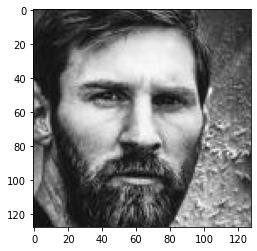

In [63]:
test_image("/Users/ira/Documents/GitHub/ML-Project/Full Data/Lionel Messi_61.jpg")

In [142]:
# Reading the image
img = cv2.imread('/Users/ira/Documents/GitHub/ML-Project/Collages/Collage_9.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('/Users/ira/Downloads/Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image

faces_rect = haar_cascade.detectMultiScale(gray_img, 1.05, 7)
# Iterating through rectangles of detected faces
#for (x, y, w, h) in faces_rect:
    #cv2.rectangle(img, (x, y), (x+w, y+h), (127, 0, 255), 2)
cv2.imshow('Detected faces', img)
cv2.destroyAllWindows()

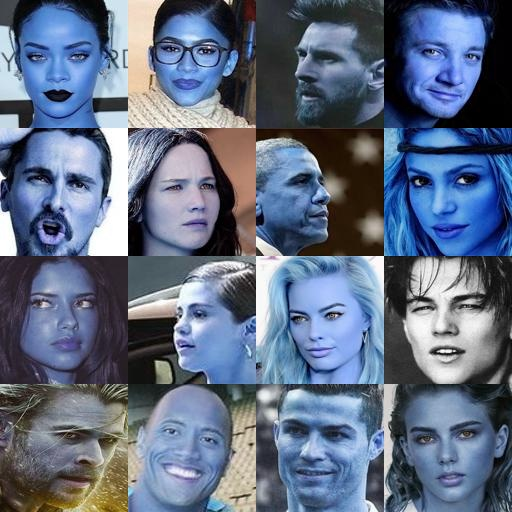

In [143]:
Image.fromarray(img)

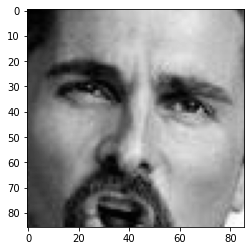

margot robbie


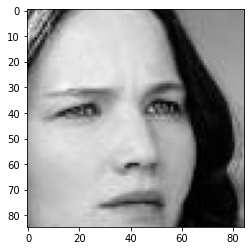

Shakira Isabel Mebarak


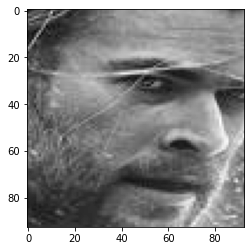

Dwayne Johnson


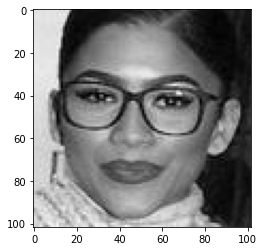

Zendaya


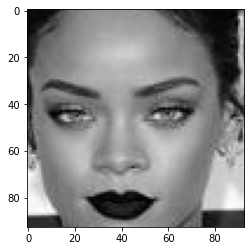

Lionel Messi


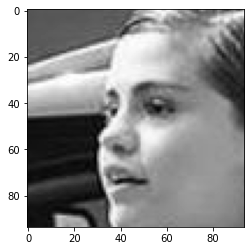

Lionel Messi


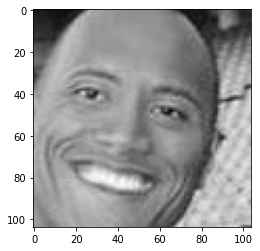

Dwayne Johnson


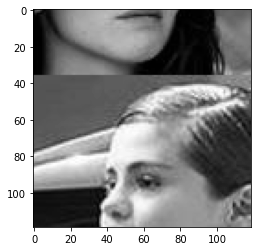

Lionel Messi


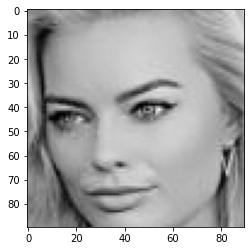

Shakira Isabel Mebarak


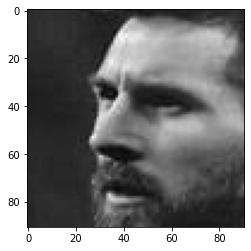

Lionel Messi


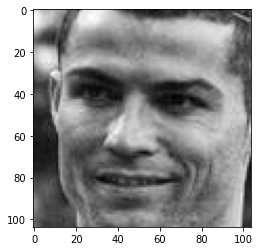

margot robbie


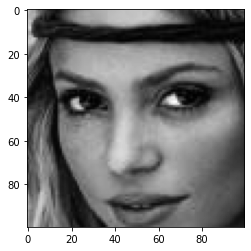

Leonardo DiCaprio


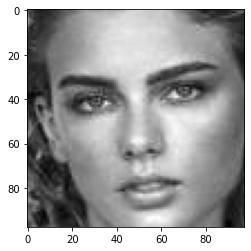

Cristiano Ronaldo


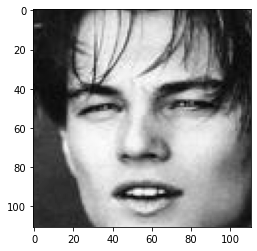

Adriana Lima


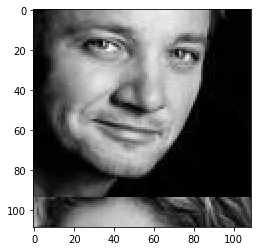

Jennifer Lawrence


In [144]:
#Testing on the Collage
for i in range(len(faces_rect)):
    test_img=img[faces_rect[i][0]:faces_rect[i][0]+faces_rect[i][2],faces_rect[i][1]:faces_rect[i][1]+faces_rect[i][3]]
    test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(test_img,cmap='gray')
    plt.show()
    test_img= cv2.resize(test_img, (image_width, image_length))
    test_img = test_img.reshape(total_pixels,1 )
    test_normalized_face_vector = test_img - avg_face_vector
    test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))
    index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))
    print(L[index].split("_")[0])